# Introduction to Bayesian Data Analysis - Applied Version


<img src="results\figures\presentation\1.png" width="500" height="500" align="center"/>


### Valerio Bonometti                                                                                    
**PhD Candidate University of York**  
**Workshop Repository:** https://github.com/vb690/introduction_bayesian_analysis

## Agenda

* Introduction
 
* Bayesian Approach to Inference

    * Counts
    * Updating Counts
    * From Counts to Probability
    * Likelihood, Parameters, Prior and Posterior 
    * Parameters Estimation
    * Bayesian Models
    
* PyMC3
    
    * Model Building 
    * Model Inspecting
    * Model Fitting
    * Model Evaluating and Comparing
    * Model Predicting
    
* Applications
    
    * PyMC3 vs scikit-learn
    * Web Traffic Estimation
    * Advertising Effect on Revenue
    * Game Difficulty Estimation
    * Model Comparison

## Introduction

### Introduction - Books

* [Statistical Rethinking 1st Edition (Chapters: 2, 3 and 4)](https://xcelab.net/rm/statistical-rethinking/)
* [Bayesian Data Analysis](http://www.stat.columbia.edu/~gelman/book/)
* Edwin Thompson Jayne

### Introduction -  Online Material

* [Statistical Rethinking using PyMC3](https://github.com/pymc-devs/resources/tree/master/Rethinking_2)
* PyMC3 [tutorials](https://docs.pymc.io/nb_tutorials/index.html) and [learning materials](https://docs.pymc.io/learn.html)

### Introduction -  Core Libraries

* Numpy
* Scipy
* PyMC3
* Theano (can be painful on Windows)
* Matplolib 
* Seaborn

In [15]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm

import numpy as np
from scipy.stats import binom, beta, norm

from sklearn.datasets import make_regression

import pymc3 as pm

import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Bayesian Approach to Inference

### "Bayesian approach to inference is all about computing plausibility of hypothesis given prior beliefs and data"

### Bayesian Approach to Inference - Counts


| Number of Reviews | Number of Outcomes | Reviews Outcomes |
| --- | --- | --- |
| 4 | 3 | Good, Bad, Good |


#### <center> What is the proportion of good reviews ? <center>

<br/>

| HYPOTHESIS | NUMBER OF WAYS [Good, Bad, Good] CAN APPEAR |
| --- | --- |
| 0.0 | 0 |
| 0.25 | 3 |
| 0.50 | 8 |
| **0.75** | **9**|
| 1.0 | 0 |
    
See [Gelman and Loken](http://www.stat.columbia.edu/~gelman/research/unpublished/p_hacking.pdf)

### Bayesian Approach to Inference - Updating Counts

#### <center> A new review is observed and it is Bad <center>


| HYPOTHESIS | PRIOR BELIEF| NUMBER OF WAYS [Bad] CAN APPEAR |  WAYS X PRIOR|
| --- | --- | --- | --- |
| 0.0 | 0 | 4 | 0 |
| 0.25 | 3 | 3 | 9 |
| **0.50** | **8** | **2** | **16** |
| 0.75 | 9| 1 | 9 |
| 1.0 | 0 | 0 | 0 |

### Bayesian Approach to Inference - From Counts to Probability

<br/>
<br/>

<center> $Posterior = \frac{Likelihood \times Prior}{Average \, Likelihood}$  <center>

<br/>
<br/>
    
<center> $Pr(Parameter |  Data) = \frac{Pr(Data | Parameter) \times Pr(Parameter)}{Pr(Data)}$ <center>
    
<br/>
<br/>

<center> $Pr(Hypothesis |  Reviews \, Outcomes) = \frac{WAYS \times PRIOR}{Normalizing}$ <center>
    
<br/>
<br/>

<center> $Pr(0.50 | Bad) = \frac{2 \times 8}{34}$ <center>


### Bayesian Approach to Inference - From Counts to Probability

<br/>
    
| HYPOTHESIS | PRIOR BELIEF| NUMBER OF WAYS [Bad] CAN APPEAR |  $\frac{WAYS \times PRIOR}{Normalizing}$|
| --- | --- | --- | --- |
| 0.0 | 0 | 4 | 0 |
| 0.25 | 3 | 3 | 0.26 |
| 0.50 | 8 | 2 | 0.47 |
| 0.75 | 9| 1 | 0.26 |
| 1.0 | 0 | 0 | 0 |
    


<img src="results\figures\presentation\applied\1.png" width="550" height="550" align="center"/>

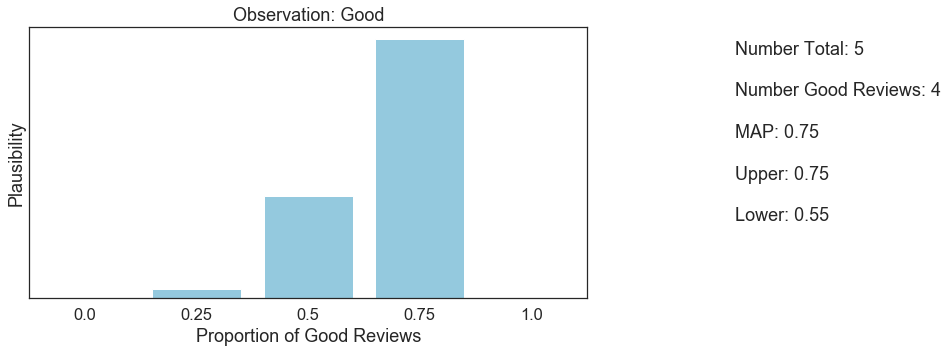

In [16]:
from modules.visuals import visualize_binomial_update

visualize_binomial_update(
    n_tests=6, 
    parameter_name='Good Reviews',
    remapper={0: 'Bad', 1: 'Good'},
    parameter_space=np.linspace(0, 1, 5),
    figsize=(10, 5),
    hist=True,
    auto=False,
    color='skyblue'
)

### Bayesian Approach to Inference - Likelihood, Parameters, Prior, Posterior

<br/>
<br/>

<center> $Posterior = \frac{Likelihood \times Prior}{Average \, Likelihood}$  <center>

#### Likelihood is a function explaining the plausibility of data given a data-generating process

Plausibility of observing **333** good reviews out of **656** total **assuming** a proportion of good reviews of **0.5**?

<center> $Observed\, Good\, Reviews \sim Binomial(Total\, Reviews, Proportion)$  <center>
<center> $333 \sim Binomial(656, 0.5)$  <center>

<center>$Pr(Good | Total, Proportion)$ = $PMF(Good)$ given $Binomial(Total, Proportion)$  <center>
<center>$Pr(333 | 656, 0.5)$ = $PMF(333)$ given $Binomial(656, 0.5)$  <center>

#### Likelihood function are defined by parameters, which are hypothesis on the data-generating process.

How the plausibility of observing **333** good reviews out of **656** total **varies** assuming proportion of good reviews that consider all the values going from **0.0** to **1.0**?

<center> $Pr(333 | 656, 0.0)$  <center>
<center> $Pr(333 | 656, 0.1)$  <center>
<center> $Pr(333 | 656, 0.2)$  <center>
<center> ...  <center>

<img src="results\figures\presentation\applied\2.png" width="550" height="550" align="center"/>

#### Prior is the initial set of plausibility that each value of the paramter to estimate can assume

Without seeing any data I can assume that there is **nearly zero** plausibility that the proportion of good reviews is **0.0** or **1.0**

$Beta(\alpha, \beta)$

<img src="results\figures\presentation\applied\3.png" width="550" height="550" align="center"/>

#### Posterior is the relatively plausibility of the parameters to estimate conditioned on the observed data
After seeing some data I update my prior. Now it is more plausibile that the proportion of Good reviews is close to 1.0

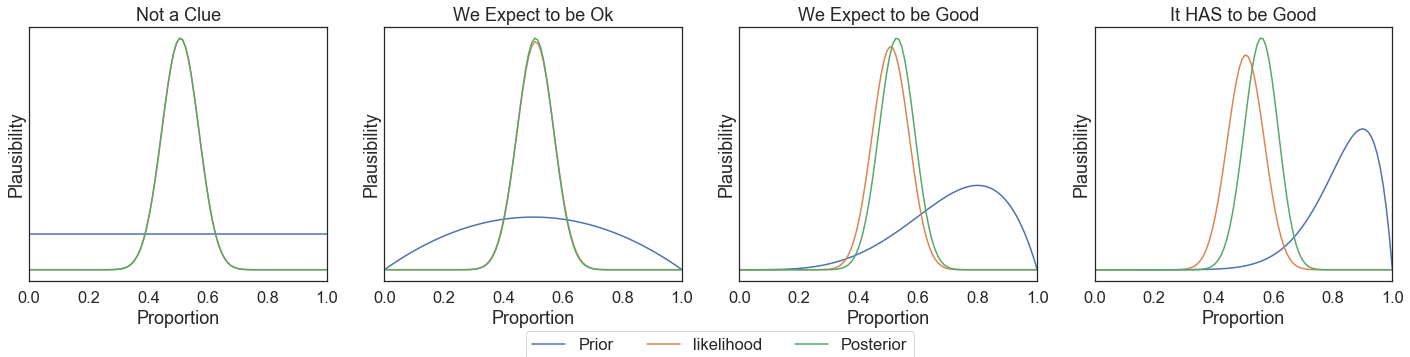

In [17]:
from modules.visuals import visualize_priors_effect

TOTAL_REVIEWS = 65
GOOD_REVIEWS = 33

PARAMETER_SPACE = np.linspace(0, 1, 100)
PRIORS = {
    'Not a Clue': np.array([1] * len(PARAMETER_SPACE)),
    'We Expect to be Ok': beta(2, 2).pdf(PARAMETER_SPACE),
    'We Expect to be Good': beta(5, 2).pdf(PARAMETER_SPACE),
    'It HAS to be Good': beta(10, 2).pdf(PARAMETER_SPACE),
}

visualize_priors_effect(
    parameter_space=PARAMETER_SPACE,
    priors=PRIORS,
    likelihood=binom.pmf(GOOD_REVIEWS, TOTAL_REVIEWS, p=PARAMETER_SPACE),
    figsize=(20, 5)
)

### Bayesian Approach to Inference - Models and Parameters Estimation


#### Prior, Likelihood and Posterior are all components aimed to do one thing: 
   
#### Define a model for a data generation process and estimate the plausibility of all the values the parameters of the model can assume, not just finding the most probable one.

### Bayesian Approach to Inference - Parameters Estimation 

A Western traveler asks an Oriental philosopher to describe the nature of the world:  
  
“It is a great ball resting on the flat back of the world turtle.”  
“Ah yes, but what does the world turtle stand on?”  
“On the back of a still larger turtle.”  
“Yes, but what does he stand on?”  
“A very perceptive question. But it’s no use, mister; it’s turtles all the way down.”

<br/>

<img src="results\figures\presentation\6.jpg" width="300" height="300" align="center"/>

<br/>

### Bayesian Approach to Inference -  DAG have Parameters and Distributions all the Way Down

<br/>

#### <center> What is the proportion of good reviews <center>

<br/>

<center> $outcome \sim Binomial(n, p)$ <center>
<center> $p \sim Beta(\alpha, \beta)$ <center>

<br/>

<img src="results\figures\presentation\8.png" width="400" height="400" align="center"/> 

### Bayesian Approach to Inference - DAG have Parameters and Distributions all the Way Down

<br />
<center> $outcome \sim Binomial(n, p)$ <center>
<center> $p \sim Beta(\alpha, \beta)$ <center>
<center> $\alpha \sim HalfNormal(\sigma_\alpha)$ <center>
<center> $\beta \sim HalfNormal(\sigma_\beta)$ <center>
<br />
<img src="results\figures\presentation\9.png" width="500" height="500" align="center"/> 

## PyMC3

### High level framework:

### 1. Bayesian modelling and probabilistic machine learning 
### 2. Built on top of Theano
### 3. Computational graphs and fast(er) inferecne

### PyMC3 - Model Building
#### <center> What is the proportion of good reviews after observing 333 of them out of 656 total ?<center>

<center> $good\, reviews \sim Binomial(total\, reviews, proportion)$ <center>
<center> $proportion \sim Beta(\alpha, \beta)$ <center>

```python
TOTAL_REVIEWS = 656
GOOD_REVIEWS = 333

with pm.Model() as p_esitmation_model:
    
    # prior distribution of the paramter to estimate
    theta = pm.Beta(
        alpha=2,
        beta=2,
        name='parameter_p')
```
```python
    # the outocme distribution
    outcome = pm.Binomial(
        p=theta,
        observed=GOOD_REVIEWS,
        n=TOTAL_REVIEWS,
        name='outcome'
    )

```

### PyMC3 - Model Building
#### <center> What is the number of total reviews and the proportion of good reviews after observing 333 of them?<center>

<center> $good\, reviews \sim Binomial(total\, reviews, proportion)$ <center>
<center> $proportion \sim Beta(\alpha, \beta)$ <center>
<center> $total\, reviews \sim Poisson(\lambda)$ <center>    

In [18]:
GOOD_REVIEWS = np.random.binomial(666, 0.52, 100)

def build_model(observed):
    """
    Function for building a PyMC3 model
    
    Arguments:
        observed: value or array of values, data to fit the model on
    
    Returns:
        estimation_model: A PyMC3 model
    """
    with pm.Model() as esitmation_model:

        # prior distribution of the paramter to estimate
        p = pm.Beta(
            alpha=3,
            beta=3,
            name='proportion'
        )

        # prior distribution of the paramter to estimate
        n = pm.Poisson(
            mu=666,
            name='total reviews'
        )

        # the outocme distribution
        outcome = pm.Binomial(
            p=p,
            observed=GOOD_REVIEWS,
            n=n,
            name='good reviews'
        )
    
    return esitmation_model

### PyMC3 - Model Inspecting

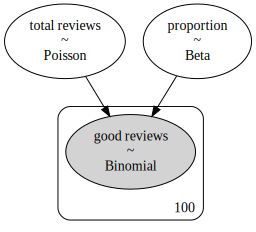

In [19]:
with build_model(GOOD_REVIEWS):
    
    graph  = pm.model_graph.model_to_graphviz()

graph  

### PyMC3 - Model Inspecting

In [20]:
with build_model(GOOD_REVIEWS):
    
    # we sample from the prior distribution of 
    # the paramters
    prior_checks = pm.sample_prior_predictive(
        samples=1000
    )

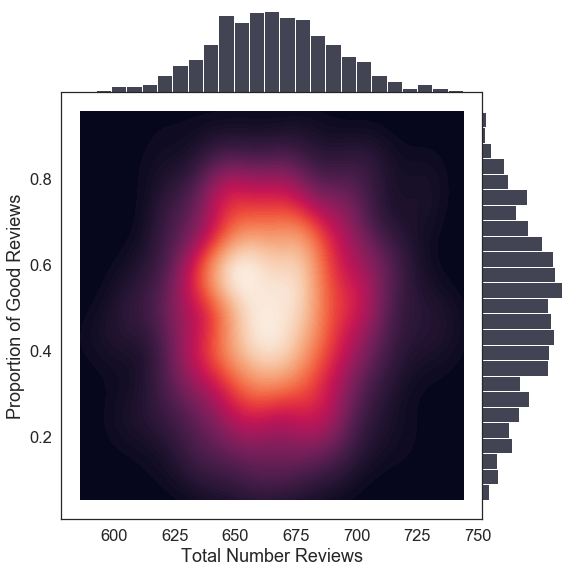

In [21]:
from modules.visuals import visualize_bivariate_parameter_grid

visualize_bivariate_parameter_grid(
    parameter_1=prior_checks['total reviews'], 
    parameter_2=prior_checks['proportion'],
    parameter_1_name='Total Number Reviews', 
    parameter_2_name='Proportion of Good Reviews',
    height=8
)

### PyMC3 - Model Fitting

In [22]:
with build_model(GOOD_REVIEWS):
    
    # find the posterior distribution using MCMC 
    train_traces = pm.sample(
        draws=2000,
        chains=2,
        tune=1000,
        cores=1
    )

Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [proportion]
>Metropolis: [total reviews]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 7 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


### PyMC3 - Model Evaluating

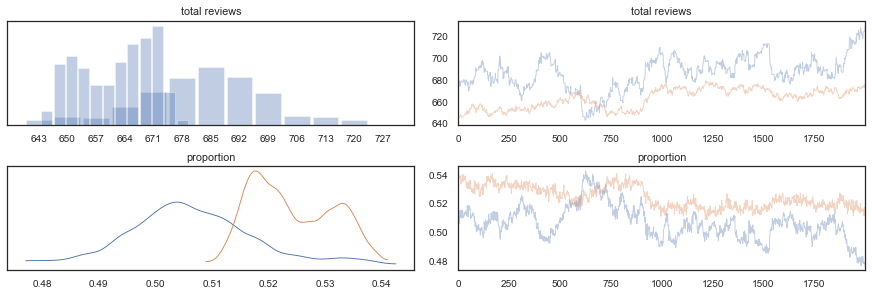

In [23]:
with build_model(GOOD_REVIEWS):
        
    # sample from the posterior distribution of the parameters
    posterior_checks = pm.sample_posterior_predictive(
        train_traces,
        var_names=['total reviews', 'proportion', 'good reviews']
    )
    
    pm.plot_trace(train_traces)

### PyMC3 - Model Evaluating

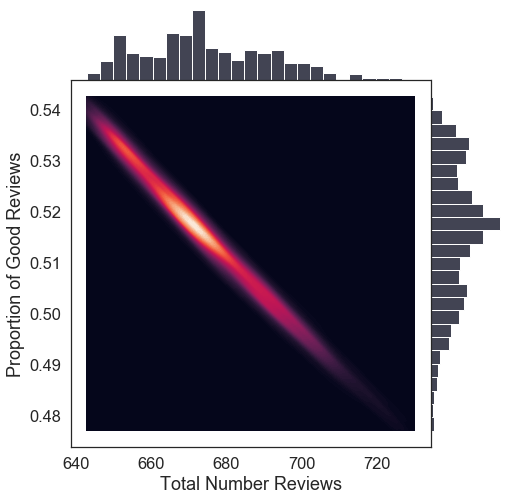

                  mean      sd   hdi_3%  hdi_97%  r_hat
total reviews  674.574  17.086  647.000  704.000   1.83
proportion       0.515   0.013    0.492    0.537   1.82


In [24]:
with build_model(GOOD_REVIEWS):
    
    # visualize the posterior distribution
    visualize_bivariate_parameter_grid(
        parameter_1=posterior_checks['total reviews'], 
        parameter_2=posterior_checks['proportion'],
        parameter_1_name='Total Number Reviews', 
        parameter_2_name='Proportion of Good Reviews',
        height=7
    )
    
    print(pm.summary(train_traces)[['mean', 'sd', 'hdi_3%', 'hdi_97%', 'r_hat']])

### PyMC3 - Model Predicting

C:\Users\valeriob\AppData\Local\Continuum\anaconda3\envs\workshop_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


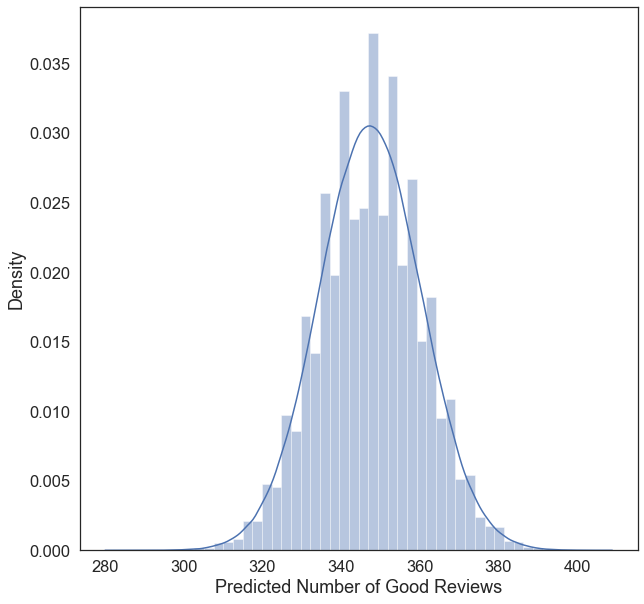

In [25]:
plt.figure(figsize=(10, 10))
sns.distplot(posterior_checks['good reviews'])
plt.xlabel('Predicted Number of Good Reviews')
plt.show()

## Applied Examples

### Applied Examples - PyMC3 vs scikit-learn

### <center> Which one is best? </center>

### <center> It depends! </center>

<center>

|   **PyMC3 - Framework**    | **scikit-learn - Toolbox** |
|:-------------: |:----------------:|
|    Flexible    |    Constrained   |
|   Modelling / Analysis  | Machine-learning |
|   White-box    |     Grey-box     |
| Non-smooth API  |    Smooth API    |
| In theory works on GCP  |    Built for GCP    |
| More Thinking  |   Less Thinking  |
| More Tinkering |   Less Tinkering |
| More Thinking  |   Less Thinking  |
| More Control   |   Less Control   |
| More Insights  |   Less Insights  |

</center>

### Applied Examples - scikit-learn Bayesian Ridge Regression

In [26]:
# sklearn will do "bayesian" fitting 
# but will return point estimate for the parameters
from sklearn.linear_model import BayesianRidge

ridge_model = BayesianRidge(
    alpha_1=0.01, # prior Gamma
    alpha_2=0.01, # prior Gamma
    lambda_1=0.01, # prior Gamma
    lambda_2=0.01 # prior Gamma
)

### Applied Examples - PyMC3 Bayesian Ridge Regression

In [27]:
X = np.random.random(100)
y = np.random.random(100)
# PyMC3 will return distribution for the parameters
with pm.Model() as ridge_model:
    # I decide that my intercpet comes from a normal distribution
    intercept = pm.Normal(
        'Intercept',
        mu=0.,
        sigma=1.
    )
    # I decide which type of prior I want to put on the slope
    slope_sigma = pm.Gamma(
        'Slope Sigma',
        alpha=0.01,
        beta=0.01
    )
    slope = pm.Normal(
        'Slope',
        mu=0,
        sd=slope_sigma ,
    )
    mu = intercept + slope*X
    sigma = pm.HalfCauchy(
        'sigma',
        beta=10.
    )
    # I decide that my outcome is normally distributed
    outcome = pm.Normal(
        'y',
        mu=mu,
        sd=sigma,
        observed=y
    )

### Applied Examples - Impact of Advertising Spending on Net Revenue

In [28]:
from modules.visuals import visualize_bivariate_relationship

X, y, coef = make_regression(
    n_samples=100,
    n_features=1,
    bias=200,
    noise=50,
    coef=True,
    random_state=56
)
X = (X - X.mean()) / X.std()
X = X.flatten()

Real Coefficient 12.04988641563446


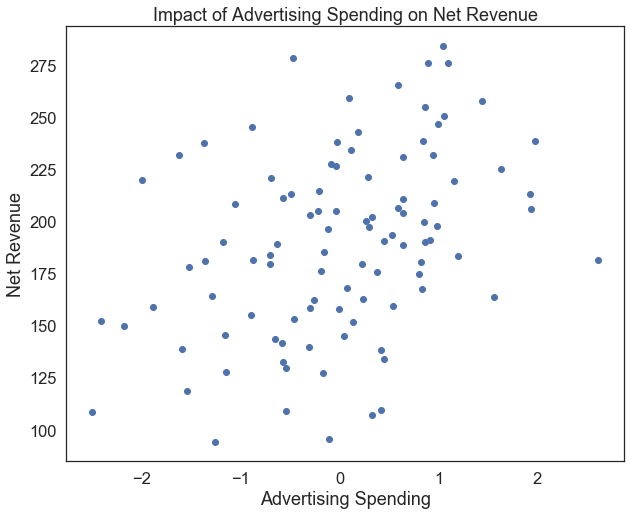

In [29]:
print(f'Real Coefficient {coef}')
visualize_bivariate_relationship(
    X=X,
    y=y,
    X_label='Advertising Spending',
    y_label='Net Revenue',
    title=f'Impact of Advertising Spending on Net Revenue',
)

<center> $y_i \sim N(\mu_i, \sigma)$ <center>
    
<center> $\sigma \sim Exponential(\lambda)$ <center> 
    
<center> $\mu_i \sim \beta_0 + \beta_1 X_i$ <center> 
    
<center> $\beta_0 \sim N(\mu, \sigma)$ <center> 
    
<center> $\beta_1 \sim N(\mu, \sigma)$ <center> 

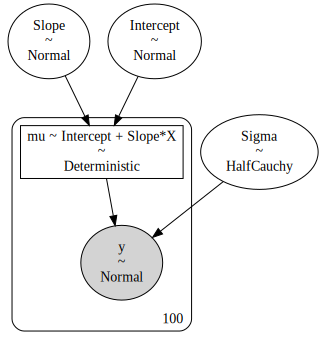

In [30]:
from modules.stats.models.linear_models import BivariateRegression

model = BivariateRegression(
    intercept_prior=(0, 100),
    slope_prior=(0, 100),
    likelihood_sigma_prior=100,
    X=X,
    y=y
)
model.show_plate()

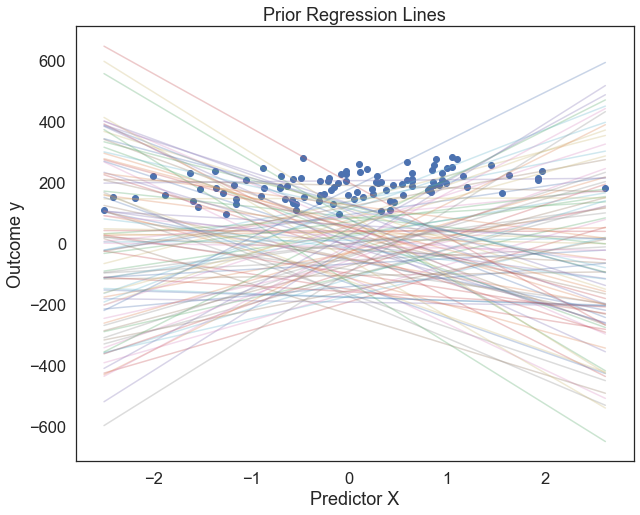

In [31]:
model.show_prior_summary()

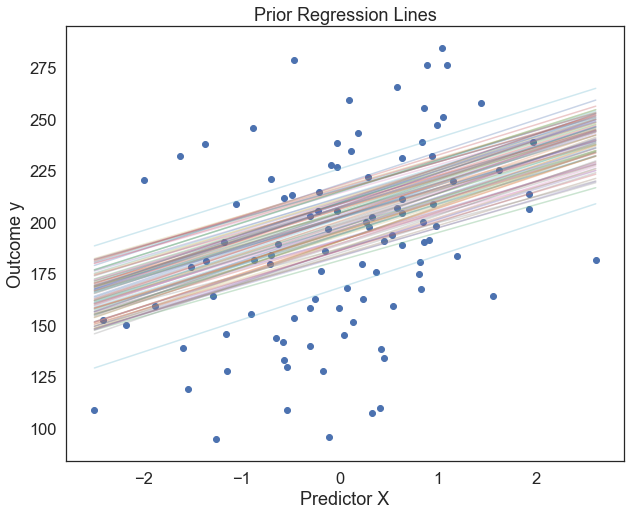

In [32]:
new_parameters = {
    'intercept_prior': (200, 10),
    'slope_prior': (15, 1),
    'likelihood_sigma_prior': 10
    
}
model.riparametrize_priors(new_parameters=new_parameters)
model.show_prior_summary()

In [33]:
model.fit(
    MAP=False, 
    draws=1000, 
    tune=2000,
    target_accept=.90,
    chains=2,
    cores=1,
    init='adapt_diag'
)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Sigma, Slope, Intercept]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 9 seconds.


MCMC Estimates

              mean     sd   hdi_3%  hdi_97%
Intercept  190.884  3.874  183.494  197.808
Slope       15.098  0.993   13.337   16.927


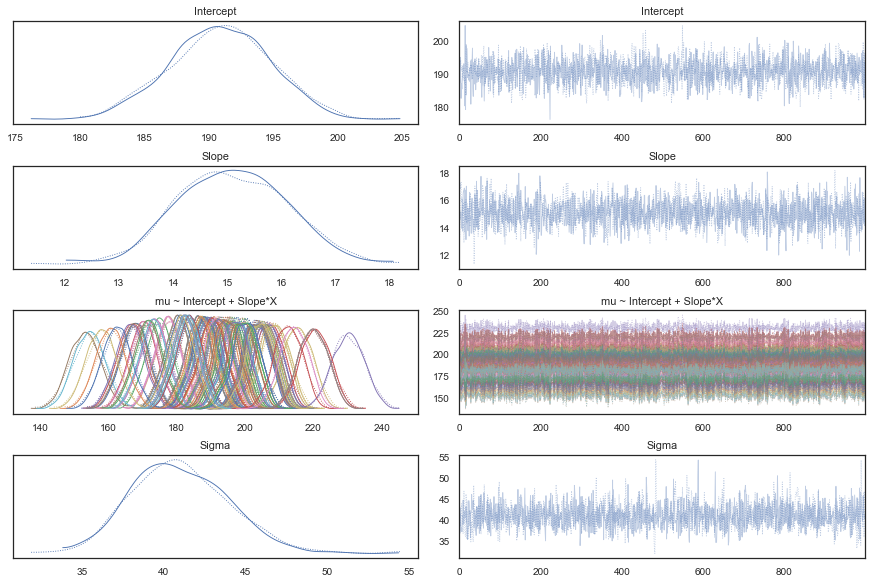

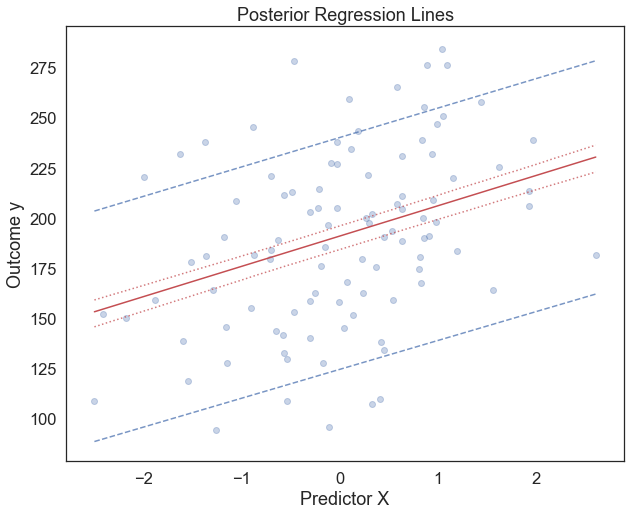

In [34]:
 model.show_posterior_summary(parameters_name=['Intercept', 'Slope'])

### Applied Examples - Estimating Future Web Traffic 

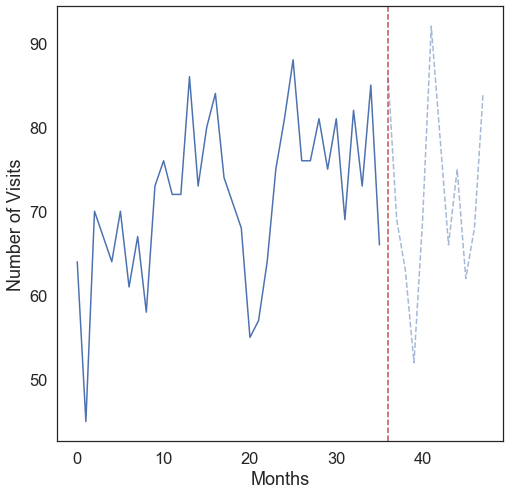

intercept: 46
slope: 0.34198991038831933


In [35]:
from modules.utils.data_utils import generate_poisson_ar_data
from modules.visuals import visualize_time_series
    
process, true_parameters = generate_poisson_ar_data(
    lam_int=50,
    slope_a=5,
    slope_b=5,
    burn_factor=3,
    time_steps=48
)

X = process[:-1]
y = process[1:]

X_tr = X[:-12]
y_tr = y[:-12]

X_ts = X[-12:]
y_ts = y[-12:]

visualize_time_series(
    X=[i for i in range(len(process))], 
    y=process, 
    prediction_point=36, 
    X_label='Months', 
    y_label='Number of Visits',
    figsize=(8, 8)
)
for parameter_name, parameter_value in true_parameters.items():
    
    print(f'{parameter_name}: {parameter_value}')

<center> $y_t \sim Poisson(\lambda_t)$ <center>
<center> $\lambda_t \sim \alpha + \beta y_{t-1}$ <center>  
<center> $\alpha \sim Poisson(\lambda)$ <center>
<center> $\beta \sim Beta(\alpha, \beta)$ <center>

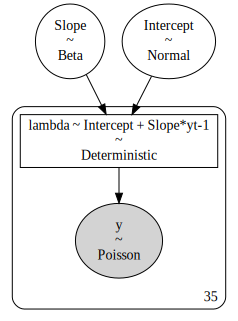

In [36]:
from modules.stats.models.linear_models import PoissonAR1

ar_1_model = PoissonAR1(
    X=X_tr,
    y=y_tr,
    intercept_prior=50,
    slope_prior=(5, 5),
)
ar_1_model.show_plate()

In [37]:
ar_1_model.fit(
    MAP=False, 
    draws=9000, 
    tune=1000,
    chains=2,
    cores=1,
    target_accept=.90
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Slope, Intercept]


Sampling 2 chains for 1_000 tune and 9_000 draw iterations (2_000 + 18_000 draws total) took 28 seconds.


MCMC Estimates

             mean     sd  hdi_3%  hdi_97%
Intercept  49.842  0.992  47.903   51.621
Slope       0.311  0.024   0.268    0.358


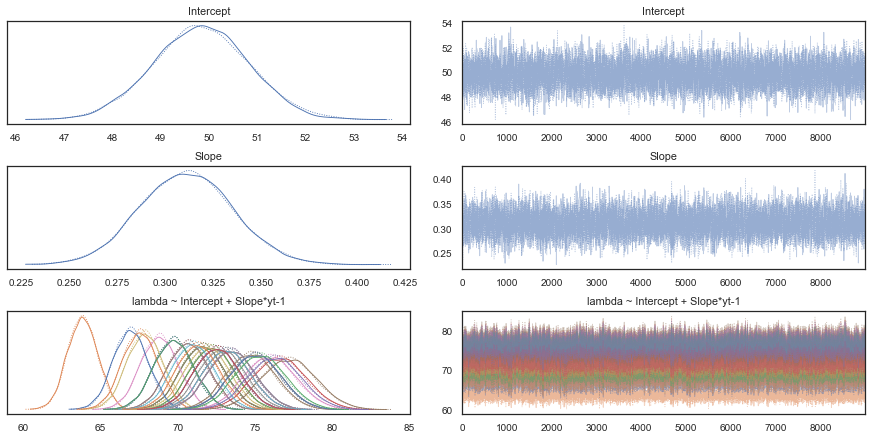

In [38]:
ar_1_model.show_posterior_summary(parameters_name=['Intercept', 'Slope'])

In [39]:
prediction = ar_1_model.predict(X_ts, y_ts, verbose=False)

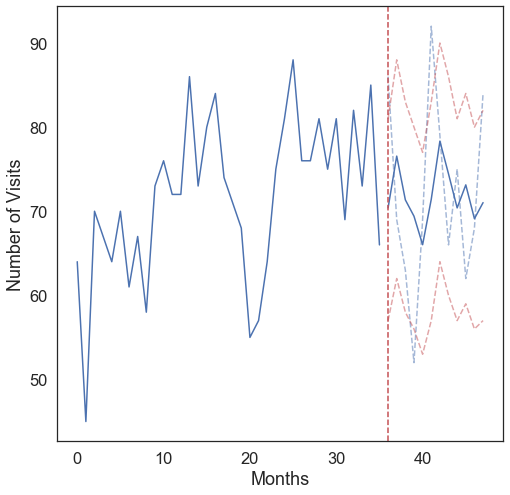

In [40]:
visualize_time_series(
    X=[i for i in range(len(process))], 
    y=process, 
    prediction=prediction['y'], 
    prediction_point=36, 
    X_label='Months', 
    y_label='Number of Visits',
    figsize=(8, 8)
)

In [ ]:
prediction = []
x = X_ts[0]
for step in tqdm(range(12)):
    
    posterior_prediction = ar_1_model.predict(x, 1, verbose=False)
    prediction.append(posterior_prediction['y'])
    x = posterior_prediction['y'].mean()

prediction = np.vstack(prediction).T

 33%|███████████████████████████▋                                                       | 4/12 [02:08<04:20, 32.62s/it]

In [ ]:
visualize_time_series(
    X=[i for i in range(len(process))], 
    y=process, 
    prediction=prediction, 
    prediction_point=36, 
    X_label='Months', 
    y_label='Number of Visits',
    figsize=(8, 8)
)

### Applied Examples - Game Difficulty and Player Ability Estimation

In [ ]:
from modules.utils.data_utils import generate_game_difficulty_data

df, true_parameters = generate_game_difficulty_data(
    players=10,
    levels=5,
    n_sessions=100
)
df.head(10)

In [ ]:
visualize_bivariate_parameter_grid(
    parameter_1=true_parameters['level_difficulty'], 
    parameter_2=true_parameters['player_ability'],
    parameter_1_name='Level Difficulty', 
    parameter_2_name='Player Ability',
    height=7
)

In [ ]:
from modules.visuals import visualize_heatmap

visualize_heatmap(
    df=true_parameters, 
    pivot_varaibles=('player_ability', 'level_difficulty', 'probability_success'), 
    rounding=4, 
    figsize=(8, 8),
)

In [ ]:
visualize_bivariate_relationship(
    X=true_parameters['delta'],
    y=true_parameters['probability_success'],
    X_label='$\Delta$(Difficulty, Ability)',
    y_label='Probability Success',
    title=f'Probability Succeding Level as Function Difficulty - Ability',
    c=true_parameters['probability_success'],
    cmap='rocket'
)

In [ ]:
from modules.stats.models.graphical_models import GameDifficultyModel

PLAYERS_ID = df['player_id'].values
LEVELS_ID = df['level'].values
ATTEMPTS = df['num_attempts'].values
SUCCESSES = df['num_success'].values

game_difficulty_model = GameDifficultyModel(
    players_id=PLAYERS_ID,
    levels_id=LEVELS_ID,
    num_attempts=ATTEMPTS,
    num_success=SUCCESSES
)

In [ ]:
game_difficulty_model.show_plate()

In [ ]:
game_difficulty_model.fit(
    MAP=False,
    draws=3000, 
    tune=2000,
    chains=2,
    cores=1,
    target_accept=.90
)

In [ ]:
game_difficulty_model.show_posterior_summary(
    parameters_name=[
        'player_ability_mu',
        'hyper_sigma',
        'level_difficulty_mu',
        'player_ability',
        'level_difficulty'
    ],
    compact=True
)

In [ ]:
game_difficulty_model.show_forest_plot(
    parameters_name=['player_ability']
)

In [ ]:
game_difficulty_model.show_forest_plot(
    parameters_name=['level_difficulty']
)

### Applied Examples - Model Comparison

In [ ]:
from modules.utils.data_utils import generate_polynomial_data
from modules.stats.models.linear_models import PolynomialRegression


df, true_parameters = generate_polynomial_data(
    X=[i for i in range(100)],
    degree=2,
    noise_ratio=0.1
)

X = df['X'].values
y = df['y'].values

visualize_bivariate_regression(
    X=X,
    y=y,
    X_label='Predictor',
    y_label='Outcome',
    title=f'Quadratic Relationship',
)

In [ ]:
models = {
    'Linear': BivariateNormalRegression(
        intercept_prior=(0, 1),
        slope_prior=(0, 1),
        likelihood_sigma_prior=1,
        X=X,
        y=y
    ),
    'Quadratic': PolynomialRegression(
        X=X,
        y=y,
        cubic=False
    ),
    'Cubic': PolynomialRegression(
        X=X,
        y=y,
        cubic=True
    )
} 
for name, model in models.items():
    
    print(f'Sampling from {name}')
    model.fit(
        MAP=False, 
        draws=1000, 
        tune=1000,
        chains=2,
        cores=1,
        target_accept=.90,
        init='adapt_diag'
    )

In [ ]:
df_results = pm.compare(
    {name: model.get_traces() for name, model in models.items()},
    ic='loo',
    scale='log'
)
df_results

In [ ]:
pm.plot_compare(
    df_results,
    figsize=(10, 5)
)